### Setup

In [89]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
# setup

from setup.equation_processor import EquationProcessor
from setup.method_processor import MethodProcessor
import pandas as pd
import copy


UID = "800547376"


RANK_TYPE = "5"
# RANK_TYPE = "4"


equation = EquationProcessor(UID, RANK_TYPE)
method = MethodProcessor()

In [91]:
pd.DataFrame(equation.data.cleaned_data)

,id,gacha_type,gacha_id,item_id,item_type,rank_type,total_warp,total_r5,get_rate_r5,win_rate_r5,...,status_r5,is_r4_rate_on,is_r5_rate_on,year,month,date,weekday,hour,minute,datetime
0,1715573400000216376,1,1001,20019,Light Cone,3,1,0,0.00,0.00,...,0,0,0,2024,5,13,0,12,28,2024-05-13 12:28:12
1,1715613000000138376,1,1001,20014,Light Cone,3,2,0,0.00,0.00,...,0,0,0,2024,5,13,0,23,8,2024-05-13 23:08:11
2,1715649000000439076,1,1001,20012,Light Cone,3,3,0,0.00,0.00,...,0,0,0,2024,5,14,1,9,57,2024-05-14 09:57:07
3,1716527400000119076,1,1001,20005,Light Cone,3,4,0,0.00,0.00,...,0,0,0,2024,5,24,4,13,50,2024-05-24 13:50:54
4,1716988200000061176,1,1001,20015,Light Cone,3,5,0,0.00,0.00,...,0,0,0,2024,5,29,2,21,1,2024-05-29 21:01:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,1733807400000148676,12,3051,21010,Light Cone,4,119,2,0.02,1.00,...,0,0,0,2024,12,10,1,13,22,2024-12-10 13:22:31
647,1733807400000150376,12,3051,20009,Light Cone,3,120,2,0.02,1.00,...,0,0,0,2024,12,10,1,13,23,2024-12-10 13:23:00
648,1733807400000151776,12,3051,20008,Light Cone,3,121,2,0.02,1.00,...,0,0,0,2024,12,10,1,13,23,2024-12-10 13:23:04
649,1733807400000152076,12,3051,20008,Light Cone,3,122,2,0.02,1.00,...,0,0,0,2024,12,10,1,13,23,2024-12-10 13:23:07


In [92]:
pd.set_option("display.max_colwidth", None)
eq = pd.DataFrame(copy.deepcopy(equation.equation_data))
eq.drop("equation data", axis=1)

,gacha type,equation string,MAE,R-squared,Diagonal Dominant
0,1,month = 8.80 + (1.62 * total_warp) + (-0.15 * total_r5) + (0.58 * total_r4),0.234353,0.984679,True
1,11,month = 6.06 + (-0.09 * total_warp) + (-0.01 * total_r5) + (0.81 * total_r4),0.191612,0.905129,False
2,12,month = 7.66 + (1.85 * total_warp) + (-0.29 * total_r5) + (-0.28 * total_r4),0.311828,0.926627,False


In [93]:
equation.modify_sort_equation([0, 2, 1])
eq = pd.DataFrame(copy.deepcopy(equation.equation_data))
eq.drop("equation data", axis=1)

,gacha type,equation string,MAE,R-squared,Diagonal Dominant
0,1,month = 8.80 + (1.62 * total_warp) + (-0.15 * total_r5) + (0.58 * total_r4),0.234353,0.984679,True
1,12,month = 7.66 + (1.85 * total_warp) + (-0.29 * total_r5) + (-0.28 * total_r4),0.311828,0.926627,False
2,11,month = 6.06 + (-0.09 * total_warp) + (-0.01 * total_r5) + (0.81 * total_r4),0.191612,0.905129,True


In [94]:
eq_data = pd.DataFrame(equation.equation_data)["equation data"]
A, b = equation.prep_equation(eq_data)

### Using Jacobi

In [95]:
jacobi = method.jacobi(A, b)
jacobi

,iteration,Total_warp,Total_r5,Total_r4,error,status
0,1,5.433127,-26.174127,7.516207,2.617413e+01,Ongoing
1,2,0.372620,0.919252,7.675421,2.709338e+01,Ongoing
2,3,2.771289,-31.150180,7.575133,3.206943e+01,Ongoing
3,4,-0.099460,-15.925648,7.282615,1.522453e+01,Ongoing
4,5,1.385038,-33.752734,7.223156,1.782709e+01,Ongoing
...,...,...,...,...,...,...
95,96,-0.037941,-33.026011,6.927762,2.421316e-10,Ongoing
96,97,-0.037941,-33.026011,6.927762,1.842864e-10,Ongoing
97,98,-0.037941,-33.026011,6.927762,1.402540e-10,Ongoing
98,99,-0.037941,-33.026011,6.927762,1.067448e-10,Ongoing


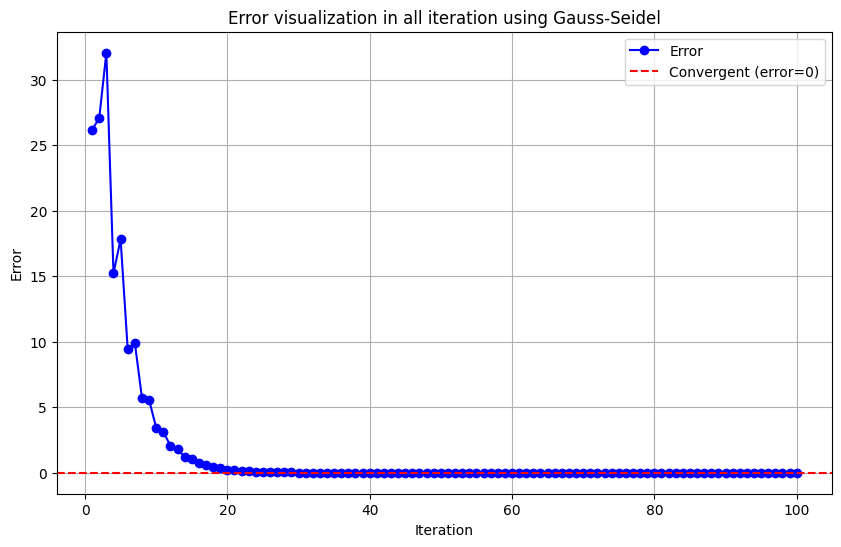

In [96]:
method.visualize(jacobi)

### Using Gauss-Seidel

In [97]:
gauss_seidel = method.gauss_seidel(A, b)
gauss_seidel

,iteration,x_values,error,status
0,1,"[5.433126869559726, 8.09351142733292, 8.281482176248424]",8.281482e+00,Ongoing
1,2,"[3.204768543131593, -13.865835049426558, 7.637943998436209]",2.195935e+01,Ongoing
2,3,"[1.4446444242590177, -24.352971227923028, 7.250920617244382]",1.048714e+01,Ongoing
3,4,"[0.6325620760206685, -29.1054943601443, 7.073877761225151]",4.752523e+00,Ongoing
4,5,"[0.2651366761520518, -31.25391937856626, 6.9938076564449085]",2.148425e+00,Ongoing
5,6,"[0.09905131863649914, -32.22502012791316, 6.957614706157844]",9.711007e-01,Ongoing
6,7,"[0.02398004301075296, -32.66396083850308, 6.941255357058541]",4.389407e-01,Ongoing
7,8,"[-0.009952412569247782, -32.86236341768289, 6.9338608795274395]",1.984026e-01,Ongoing
8,9,"[-0.025289988881598127, -32.95204200510846, 6.93051855250662]",8.967859e-02,Ongoing
9,10,"[-0.03222262142759607, -32.99257700757961, 6.929007810221822]",4.053500e-02,Ongoing


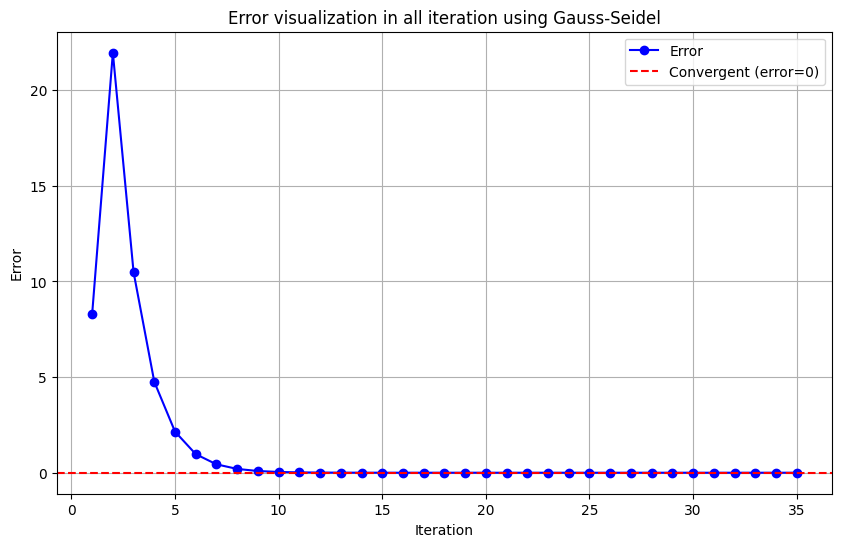

In [98]:
method.visualize(gauss_seidel)